In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.metrics import accuracy_score

%matplotlib inline
sns.set



<function seaborn.rcmod.set>

In [5]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [ ]:
Perform Data Analysis

In [9]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [11]:
#df_train has 891 entries, some values for Cabin and Age are missing

In [12]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [15]:
#Also in df_test some values for Age and many values for Cabin are missing


In [16]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
#Comparing distribution of features in df_train and df_test, Pclass and Age seem very similar, distributions for SibSo, Parch and Fare only slightly different

In [18]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [19]:
# Of all passengers in df_train, how many survived and how many died?

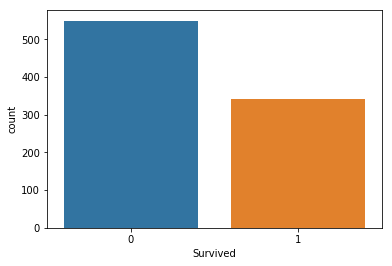

In [20]:
sns.countplot(x='Survived', data=df_train);

In [24]:
print(df_train.Survived.sum()/df_train.Survived.count())

0.383838383838


In [25]:
# more people died than survived(38% survived)

In [30]:
df_train.groupby(['Survived', 'Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

In [32]:
## Sex: Female more likely to survive than male**

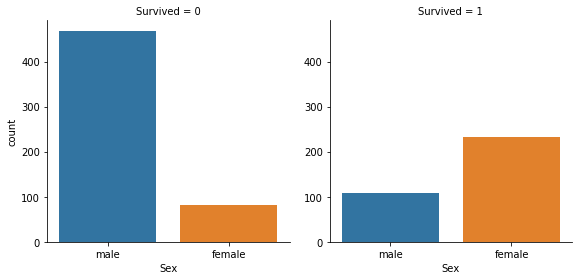

In [33]:
sns.factorplot(x='Sex', kind='count',col='Survived',data=df_train)

In [35]:
print("% of women survived", df_train[df_train.Sex=='female'].Survived.sum()/df_train[df_train.Sex=='female'].Survived.count())
print("% of men survived", df_train[df_train.Sex=='male'].Survived.sum()/df_train[df_train.Sex=='male'].Survived.count())

% of women survived 0.742038216561
% of men survived 0.188908145581


In [36]:
#Women were more likely to survive than men 

# 74 % of women survived
# but only 19% of men
# (in training set)

In [37]:
## Passenger Class : Survival rate decreases with Pclass

In [38]:
pd.crosstab(df_train.Pclass, df_train.Survived, margins=True).style.background_gradient(cmap='autumn_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [42]:
print("% of survival in ")
print(" Pclass1 :", df_train[df_train.Pclass==1].Survived.sum()/df_train[df_train.Pclass==1].Survived.count())
print(" Pclass2 :", df_train[df_train.Pclass==2].Survived.sum()/df_train[df_train.Pclass==2].Survived.count())
print(" Pclass3 :", df_train[df_train.Pclass==3].Survived.sum()/df_train[df_train.Pclass==3].Survived.count())

% of survival in 
 Pclass1 : 0.62962962963
 Pclass2 : 0.472826086957
 Pclass3 : 0.242362525458


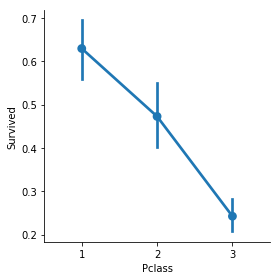

In [43]:
sns.factorplot('Pclass','Survived',data=df_train)
plt.show()

In [44]:
df_test['Survived'] = df_test.Sex == 'female'

In [45]:
df_test['Survived'] = df_test.Survived.apply(lambda x: int(x))

In [46]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [ ]:
#*Passenger Class and Sex :**

#*Almost all women in Pclass 1 and 2 survived and nearly all men in Pclass 2 and 3 died**

In [47]:
pd.crosstab([df_train.Sex, df_train.Survived], df_train.Pclass, margins=True).style.background_gradient(cmap='autumn_r')

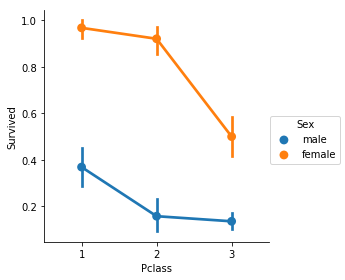

In [48]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df_train)
plt.show()

In [49]:
# **Embarked : Survival rate lowest for S and highest for C**

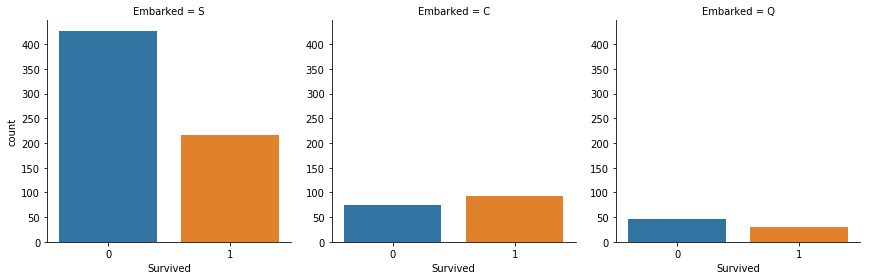

In [50]:
sns.factorplot(x='Survived', col='Embarked', kind='count', data=df_train);

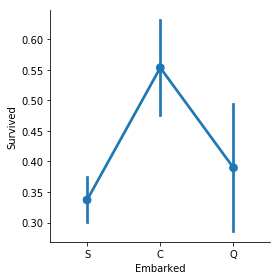

In [51]:
sns.factorplot('Embarked','Survived', data=df_train)
plt.show()

In [52]:
# EMBARKED AND SEX

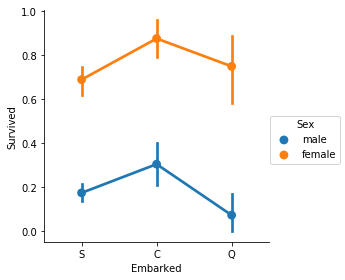

In [53]:
sns.factorplot('Embarked','Survived', hue= 'Sex', data=df_train)
plt.show()

In [54]:
##Embarked, Pclass and Sex :**

#* Practically all women of Pclass 2 that embarked in C and Q survived, also nearly all women of Pclass 1 survived. **

#** All men of Pclass 1 and 2 embarked in Q died, survival rate for men in Pclass 2 and 3 is always below 0.2 **

#** For the remaining men in Pclass 1 that embarked in S and Q, survival rate is approx. 0.4 **

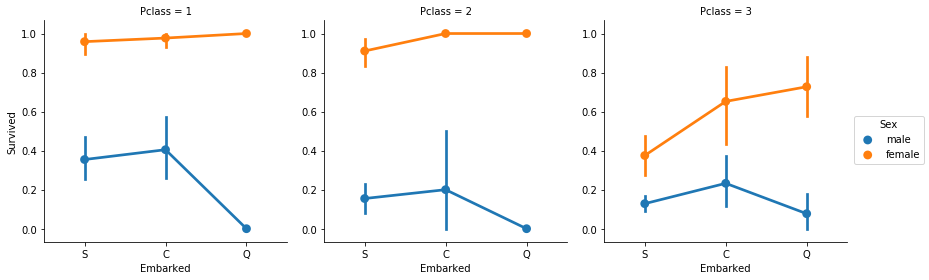

In [55]:
sns.factorplot('Embarked','Survived', col='Pclass', hue= 'Sex', data=df_train)
plt.show()

In [56]:
pd.crosstab([df_train.Survived], [df_train.Sex, df_train.Pclass, df_train.Embarked], margins=True)

Sex      female                              male                            \
Pclass        1         2          3            1          2          3       
Embarked      C  Q   S  C  Q   S   C   Q   S    C  Q   S   C  Q   S   C   Q   
Survived                                                                      
0             1  0   2  0  0   6   8   9  55   25  1  51   8  1  82  33  36   
1            42  1  46  7  2  61  15  24  33   17  0  28   2  0  15  10   3   
All          43  1  48  7  2  67  23  33  88   42  1  79  10  1  97  43  39   

Sex            All  
Pclass              
Embarked    S       
Survived            
0         231  549  
1          34  340  
All       265  889

In [57]:
#**Age categorical**

In [58]:
for df in [df_train, df_test]:
    df['Age_ctg']=np.nan
    for i in range(8,0,-1):
        df.loc[ df['Age'] <= i*10, 'Age_ctg'] = i

In [59]:
print(df_train[['Age' , 'Age_ctg']].head(10))

    Age  Age_ctg
0  22.0      3.0
1  38.0      4.0
2  26.0      3.0
3  35.0      4.0
4  35.0      4.0
5   NaN      NaN
6  54.0      6.0
7   2.0      1.0
8  27.0      3.0
9  14.0      2.0


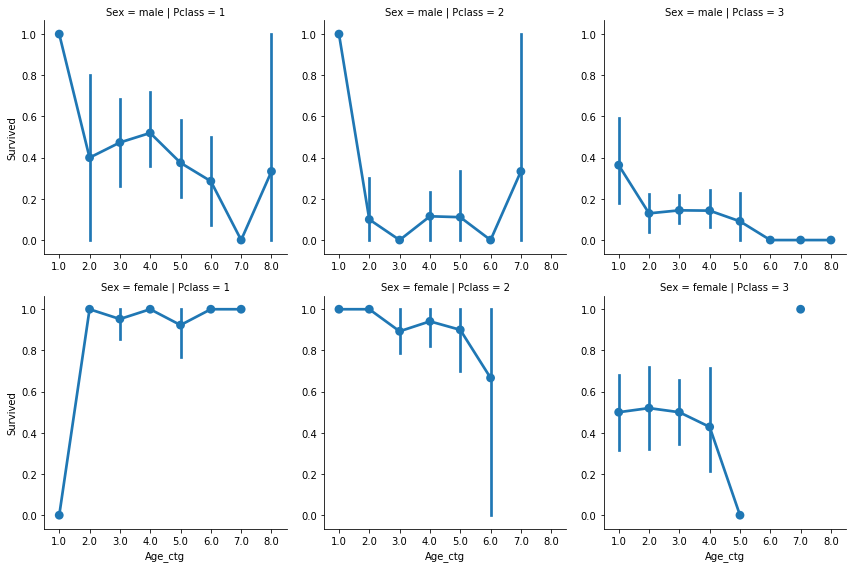

In [60]:
sns.factorplot('Age_ctg','Survived', col='Pclass' , row = 'Sex', data=df_train)
plt.show()

In [61]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.Age_ctg, df_train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

In [62]:
'''For passengers in Age_ctg = 1 (younger than 10) : All male in Pclass 1 and 2 survived

All female in Pclass 3 and Age_ctg = 5 died. 

(Survival rate for female in Pclass 3 and Age_ctg = 4 is below 50%)

(Survival rate for male in Pclass 1 and Age_ctg = 4 is above 50%)'''

'For passengers in Age_ctg = 1 (younger than 10) : All male in Pclass 1 and 2 survived\n\nAll female in Pclass 3 and Age_ctg = 5 died. \n\n(Survival rate for female in Pclass 3 and Age_ctg = 4 is below 50%)\n\n(Survival rate for male in Pclass 1 and Age_ctg = 4 is above 50%)'

In [63]:
# in Pclass 1 and 2 all men in Age_ctg = 1 survived
df_test.loc[ (df_test.Sex == 'male') & (df_test.Pclass == 1) & (df_test.Age_ctg == 1), 'Survived'] = 1
df_test.loc[ (df_test.Sex == 'male') & (df_test.Pclass == 2) & (df_test.Age_ctg == 1), 'Survived'] = 1

# all women in Pclass 3 and Age_ctg = 5 died
df_test.loc[ (df_test.Sex == 'female') & (df_test.Pclass == 3) & (df_test.Age_ctg == 5) , 'Survived'] = 0

# Survival rate for female in Pclass 3 and Age_ctg = 4 is below 50%
# df_test.loc[ (df_test.Sex == 'female') & (df_test.Pclass == 3) & (df_test.Age_ctg == 4) , 'Survived'] = 0

# Survival rate for male in Pclass 1 and Age_ctg = 4 is above 50%
#df_test.loc[ (df_test.Sex == 'male') & (df_test.Pclass == 1) & (df_test.Age_ctg == 4) , 'Survived'] = 1

#df_test.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Age_ctg
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,4.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,5.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,7.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,3.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,3.0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0,2.0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1,3.0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0,3.0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1,2.0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0,3.0


In [64]:
# SibSp and Parch

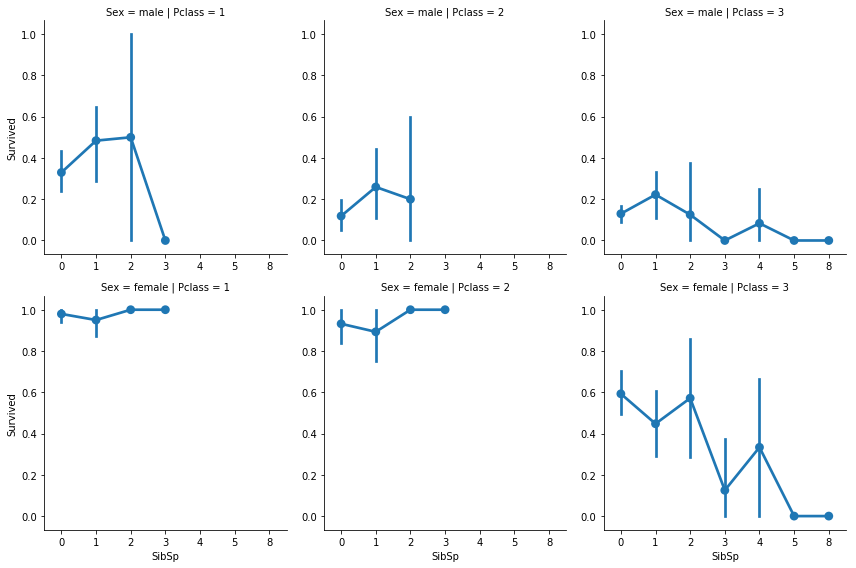

In [65]:
sns.factorplot('SibSp','Survived', col='Pclass' , row = 'Sex', data=df_train)
plt.show()

In [66]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.SibSp, df_train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

In [67]:
'''For males, no survival rate above 0.5 for any values of SibSp.
For females, passengers with SibSp = 3 and Pclass = 3 died, also all females with SibSp > 4 died.
For females with SibSp = 1 and Pclass = 3 survival rate is below 0.5'''

'For males, no survival rate above 0.5 for any values of SibSp.\nFor females, passengers with SibSp = 3 and Pclass = 3 died, also all females with SibSp > 4 died.\nFor females with SibSp = 1 and Pclass = 3 survival rate is below 0.5'

In [68]:
# females with SibSp = 3 and Pclass = 3 died
df_test.loc[ (df_test.Sex == 'female') & (df_test.Pclass == 3) & (df_test.SibSp == 3), 'Survived'] = 0

# all females with SibSp > 7 died
df_test.loc[ (df_test.Sex == 'female') & (df_test.SibSp > 7) , 'Survived'] = 0

# For females with SibSp = 1 and Pclass = 3 survival rate is below 0.5
#df_test.loc[ (df_test.Sex == 'female') & (df_test.Pclass == 3) & (df_test.SibSp == 1) , 'Survived'] = 0

df_test.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Age_ctg
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,4.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,5.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,7.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,3.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,3.0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0,2.0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1,3.0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0,3.0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1,2.0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0,3.0


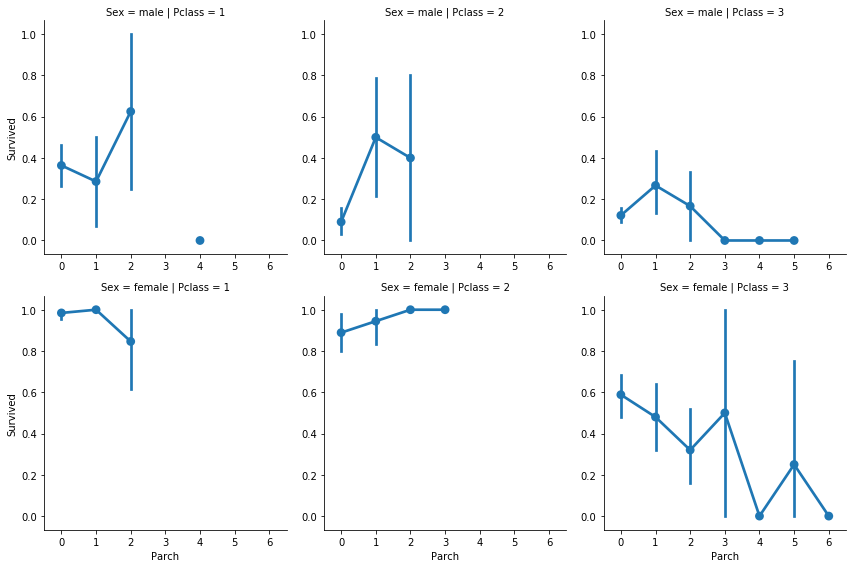

In [69]:
sns.factorplot('Parch','Survived', col='Pclass' , row = 'Sex', data=df_train)
plt.show()

In [70]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.Parch, df_train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

In [71]:
# Fare categorical


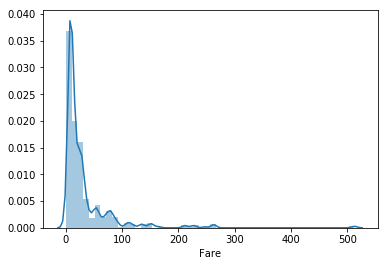

In [72]:
sns.distplot(df_train['Fare'])
plt.show()


In [73]:
for df in [df_train, df_test]:
    df['Fare_ctg']=np.nan
    for i in range(12,0,-1):
        df.loc[ df['Fare'] <= i*50, 'Fare_ctg'] = i

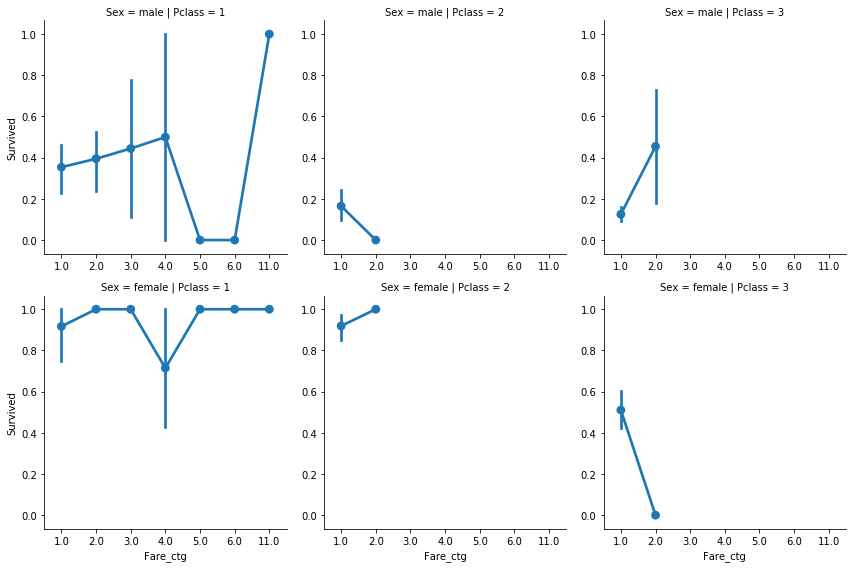

In [74]:
sns.factorplot('Fare_ctg','Survived', col='Pclass' , row = 'Sex', data=df_train)
plt.show()

In [75]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.Fare_ctg, df_train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

In [76]:
#  Part 2: Data wrangling and feature engineering



In [84]:
df_train_ml = df_train.copy()
df_test_ml = df_test.copy()

In [85]:
sex = pd.get_dummies(df_train_ml['Sex'],drop_first=True)
embark = pd.get_dummies(df_train_ml['Embarked'],drop_first=True)
df_train_ml.drop(['Sex','Embarked','Name','Ticket', 'Cabin', 'Age_ctg', 'Fare_ctg'],axis=1,inplace=True)
df_train_ml = pd.concat([df_train_ml,sex,embark],axis=1)
df_train_ml.dropna(inplace=True)

In [86]:
sex = pd.get_dummies(df_test_ml['Sex'],drop_first=True)
embark = pd.get_dummies(df_test_ml['Embarked'],drop_first=True)
df_test_ml.drop(['Sex','Embarked','Name','Ticket', 'Cabin', 'Age_ctg', 'Fare_ctg'],axis=1,inplace=True)
df_test_ml = pd.concat([df_test_ml,sex,embark],axis=1)
#df_test_ml.dropna(inplace=True)

In [87]:
df_train_ml.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [88]:
df_test_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Survived       418 non-null int64
male           418 non-null uint8
Q              418 non-null uint8
S              418 non-null uint8
dtypes: float64(2), int64(5), uint8(3)
memory usage: 24.2 KB


In [89]:
df_test_ml.drop(['Survived'],axis=1,inplace=True)
df_test_ml.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [90]:
df_test_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
male           418 non-null uint8
Q              418 non-null uint8
S              418 non-null uint8
dtypes: float64(2), int64(4), uint8(3)
memory usage: 20.9 KB


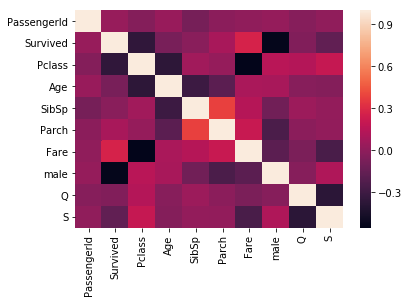

In [91]:
corr = df_train_ml.corr()
sns.heatmap(corr)

In [92]:
# Machine Learning



In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train_ml.drop('Survived',axis=1), df_train_ml['Survived'], test_size=0.30, random_state=101)

In [94]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [95]:
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.77      0.86      0.82       123
          1       0.78      0.66      0.72        92

avg / total       0.78      0.78      0.77       215



In [96]:
# Decision Tree


In [97]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [98]:
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.72      0.80      0.76       123
          1       0.69      0.59      0.64        92

avg / total       0.71      0.71      0.71       215

